<a href="https://colab.research.google.com/github/jimmydev88/MachineLearning/blob/main/los_mtmh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set()

## Importing the dataset

In [121]:
dataset = pd.read_csv('datamtmh1.csv')
dataset

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.0,III,42116633.79,I25.1,0,3
1,55.0,II,49029728.86,I25.1,0,3
2,62.0,II,58691716.79,I21.9,E11.9,2
3,60.0,I,56115107.25,I21.1,0,3
4,59.0,I,50127856.80,I25.0,0,2
...,...,...,...,...,...,...
505,NaN,I,55204688.01,I20.0,I10,3
506,NaN,I,83083621.98,I21.1,0,4
507,NaN,III,69933426.96,I21.0,E11.9,14
508,NaN,I,63898232.46,I21.9,0,4


##Missing Values

In [122]:
dataset['Umur'].fillna((dataset['Umur'].mean()), inplace=True)

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Umur       510 non-null    float64
 1   Class      510 non-null    object 
 2   TOTALRS    510 non-null    float64
 3   DIAGNOSA1  510 non-null    object 
 4   DIAGNOSA2  510 non-null    object 
 5   LOS        510 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 24.0+ KB


In [124]:
df = dataset.copy()
df.describe(include='all')
df[df['LOS']<11]

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.000000,III,42116633.79,I25.1,0,3
1,55.000000,II,49029728.86,I25.1,0,3
2,62.000000,II,58691716.79,I21.9,E11.9,2
3,60.000000,I,56115107.25,I21.1,0,3
4,59.000000,I,50127856.80,I25.0,0,2
...,...,...,...,...,...,...
504,56.027254,I,66483133.71,I21.9,0,5
505,56.027254,I,55204688.01,I20.0,I10,3
506,56.027254,I,83083621.98,I21.1,0,4
508,56.027254,I,63898232.46,I21.9,0,4


##Remove Outlier

In [125]:
df_wo_outlier = df[df['LOS'] < 11]
df_wo_outlier.describe(include='all')

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
count,508.000000,508,5.080000e+02,508,508,508.000000
unique,NaN,3,NaN,12,9,NaN
top,NaN,I,NaN,I25.1,0,NaN
freq,NaN,223,NaN,121,411,NaN
mean,56.021402,NaN,5.711203e+07,NaN,NaN,3.793307
std,8.633428,NaN,1.007002e+07,NaN,NaN,1.061517
min,29.000000,NaN,3.972719e+07,NaN,NaN,1.000000
25%,50.000000,NaN,4.949981e+07,NaN,NaN,3.000000
50%,56.027254,NaN,5.472029e+07,NaN,NaN,4.000000
75%,62.000000,NaN,6.302182e+07,NaN,NaN,4.000000


In [126]:
X = df_wo_outlier[['Umur']]
y = df_wo_outlier['LOS']
f_regression(X,y)
p_values = f_regression(X,y)[1]
p_values

array([0.79])

In [127]:
le = LabelEncoder()

In [128]:
diag1_lst = df_wo_outlier.loc[:,'DIAGNOSA1'].unique()
diag1_lst.sort()
diag1_dict = dict(zip(diag1_lst, range(len(diag1_lst))))
df_wo_outlier.DIAGNOSA1.replace(diag1_dict, inplace=True)

diag2_lst = df_wo_outlier.loc[:,'DIAGNOSA2'].unique()
diag2_lst.sort()
diag2_dict = dict(zip(diag2_lst, range(len(diag2_lst))))
df_wo_outlier.DIAGNOSA2.replace(diag2_dict, inplace=True)

class_lst = df_wo_outlier.loc[:,'Class'].unique()
class_lst.sort()
class_dict = dict(zip(class_lst, range(len(class_lst))))
df_wo_outlier.Class.replace(class_dict, inplace=True)
    

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [129]:
df_wo_outlier

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.000000,2,42116633.79,10,0,3
1,55.000000,1,49029728.86,10,0,3
2,62.000000,1,58691716.79,5,2,2
3,60.000000,0,56115107.25,3,0,3
4,59.000000,0,50127856.80,9,0,2
...,...,...,...,...,...,...
504,56.027254,0,66483133.71,5,0,5
505,56.027254,0,55204688.01,0,3,3
506,56.027254,0,83083621.98,3,0,4
508,56.027254,0,63898232.46,5,0,4


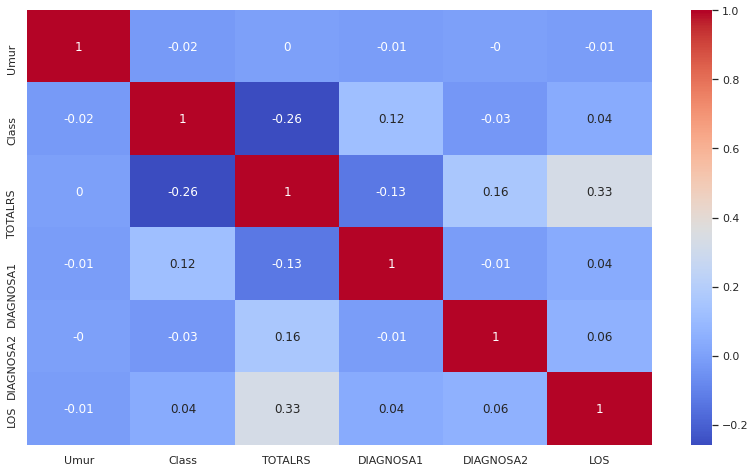

In [130]:
plt.figure(figsize=(14, 8))
corr_matrix = df_wo_outlier.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

In [111]:
X = df_wo_outlier.loc[:,('Umur', 'Class', 'DIAGNOSA1', 'DIAGNOSA2')]
y = df_wo_outlier.loc[:,'LOS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 80, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [112]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.13815741060198805